In [1]:
from textblob import TextBlob
import pandas as pd
from spacy.tokenizer import Tokenizer
from spacy.lang.tr import Turkish
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = pd.read_csv('lemessi10.csv')
data

,tweet
0,leo messi cristiano special competition among ...
1,poles stop leo messi
2,la liga goal assist king champions league top ...
3,leo messi became first player score goal diffe...
4,come tomorrow start work fenerbahçe
...,...
20099,via drawing lionel messi art lionelmessi barce...
20100,lionel messi made funny comment allegations ma...
20101,lionelmessi dont worry messi father go jail gi...
20102,lionel messi without detonating bomb


In [3]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['tweet'].apply(getSubjectivity)
data['Polarity'] = data['tweet'].apply(getPolarity)

data

,tweet,Subjectivity,Polarity
0,leo messi cristiano special competition among ...,0.586190,0.225119
1,poles stop leo messi,0.000000,0.000000
2,la liga goal assist king champions league top ...,0.766667,0.200000
3,leo messi became first player score goal diffe...,0.466667,0.125000
4,come tomorrow start work fenerbahçe,0.000000,0.000000
...,...,...,...
20099,via drawing lionel messi art lionelmessi barce...,0.000000,0.000000
20100,lionel messi made funny comment allegations ma...,1.000000,0.250000
20101,lionelmessi dont worry messi father go jail gi...,0.375000,-0.050000
20102,lionel messi without detonating bomb,0.000000,0.000000


In [4]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,tweet,Subjectivity,Polarity,Analysis
0,leo messi cristiano special competition among ...,0.586190,0.225119,Positive
1,poles stop leo messi,0.000000,0.000000,Neutral
2,la liga goal assist king champions league top ...,0.766667,0.200000,Positive
3,leo messi became first player score goal diffe...,0.466667,0.125000,Positive
4,come tomorrow start work fenerbahçe,0.000000,0.000000,Neutral
...,...,...,...,...
20099,via drawing lionel messi art lionelmessi barce...,0.000000,0.000000,Neutral
20100,lionel messi made funny comment allegations ma...,1.000000,0.250000,Positive
20101,lionelmessi dont worry messi father go jail gi...,0.375000,-0.050000,Negative
20102,lionel messi without detonating bomb,0.000000,0.000000,Neutral


In [5]:
data['Analysis'] = preprocessing.LabelEncoder().fit_transform(data['Analysis'])
print(data['Analysis'])

0        2
1        1
2        2
3        2
4        1
        ..
20099    1
20100    2
20101    0
20102    1
20103    1
Name: Analysis, Length: 20104, dtype: int32


In [6]:
vect = TfidfVectorizer(analyzer='word',lowercase=False)
sent_vector = vect.fit_transform(data['tweet'])

print(sent_vector)

  (0, 4901)	0.24890649791616995
  (0, 8400)	0.2248843852005883
  (0, 9616)	0.3005265054293155
  (0, 10463)	0.26443682295436655
  (0, 10755)	0.12437836632510421
  (0, 10674)	0.3197556424753424
  (0, 7505)	0.2278590916842625
  (0, 7275)	0.23068237973977024
  (0, 5929)	0.23467514211515997
  (0, 6787)	0.22452939908218347
  (0, 11463)	0.2566928707888658
  (0, 3862)	0.2623376404230149
  (0, 13088)	0.16746638314826084
  (0, 513)	0.2594037296105074
  (0, 2752)	0.2533717944917551
  (0, 11704)	0.2371030045770058
  (0, 3021)	0.1715437410829645
  (0, 8023)	0.04858473815579372
  (0, 7227)	0.12901752474861564
  (1, 11908)	0.5178896470172775
  (1, 9848)	0.7899569787592855
  (1, 8023)	0.11568574755708025
  (1, 7227)	0.30720529460603546
  (2, 1170)	0.2186445418362964
  (2, 5348)	0.18889864998589814
  :	:
  (20100, 7616)	0.44798571528983555
  (20100, 12290)	0.16821154871745747
  (20100, 8023)	0.06011974980385498
  (20101, 6545)	0.4695915522642063
  (20101, 13604)	0.38123226179833347
  (20101, 4240)	0.31

In [7]:
x_train,x_test,y_train,y_test = train_test_split(sent_vector,data['Analysis'],test_size=0.2,random_state=0)

In [8]:
"""
from matplotlib import pyplot as plt

plt.plot(x_train[2].toarray()[0])
x_train[2]
"""

'\nfrom matplotlib import pyplot as plt\n\nplt.plot(x_train[2].toarray()[0])\nx_train[2]\n'

In [11]:
from keras.utils import to_categorical

train_encoded = to_categorical(y_train)
test_encoded = to_categorical(y_test)
print(train_encoded)
print(test_encoded)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [12]:
n_sent, n_vect = np.shape(x_train)
xx_train = np.reshape(x_train.toarray(),(n_sent,n_vect,1))

nn_sent,nn_vect = np.shape(x_test)
xx_test =np.reshape(x_test.toarray(),(nn_sent,nn_vect,1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,GlobalMaxPooling1D,Dropout,Flatten
import tensorflow

In [14]:
model = Sequential()

model.add(Conv1D(filters=64,kernel_size=n_vect,padding='valid',activation='relu',strides=1))

model.add(GlobalMaxPooling1D())

model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.build()

ValueError: You must provide an `input_shape` argument.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1, 64)             899648    
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 904,003
Trainable params: 904,003
Non-trainable params: 0
_________________________________________________________________


In [17]:
history=model.fit(xx_train,train_encoded,batch_size=10,epochs=30,verbose=1,validation_data=(xx_test,test_encoded))

Epoch 1/30
1609/1609 [==============================] - 20s 12ms/step - loss: 0.6358 - accuracy: 0.7418 - val_loss: 0.1543 - val_accuracy: 0.9527
Epoch 2/30
1609/1609 [==============================] - 20s 13ms/step - loss: 0.0711 - accuracy: 0.9780 - val_loss: 0.1412 - val_accuracy: 0.9612
Epoch 3/30
1609/1609 [==============================] - 18s 11ms/step - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.1360 - val_accuracy: 0.9679
Epoch 4/30
1609/1609 [==============================] - 19s 12ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.1868 - val_accuracy: 0.9647
Epoch 5/30
1609/1609 [==============================] - 19s 12ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.1680 - val_accuracy: 0.9662
Epoch 6/30
1609/1609 [==============================] - 19s 12ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1860 - val_accuracy: 0.9659
Epoch 7/30
1609/1609 [==============================] - 19s 12ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.2029 -

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

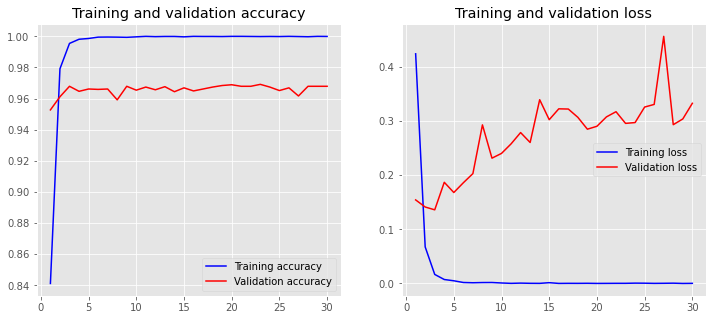

In [20]:
plot_history(history)

In [21]:
from sklearn.svm  import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
svm = SVC(kernel='linear')#eğitim başlıyor
fit = svm.fit(x_train,y_train)

In [23]:
res = svm.predict(x_test) #test veri kümesini sınıflandırıcıya gönderiyoruz
print(res)

[2 1 0 ... 1 2 1]


In [24]:
acc = accuracy_score(y_test,res)
print(acc)

0.9621984580950013


In [25]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test, res))

0.9335620353407431


In [26]:
from sklearn.metrics import precision_score
print(precision_score(y_test, res,average='micro'))

0.9621984580950013


In [27]:
from sklearn.metrics import recall_score
print(recall_score(y_test, res, average='micro'))

0.9621984580950013


In [28]:
from sklearn.metrics import f1_score
print(f1_score(y_test, res, average='macro'))

0.9444958980098712
